<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/MIC_correlation_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Illustration of Maximal Information Coefficient in 2d

Code is from here: https://github.com/minepy/minepy


In [1]:
# Source code modified from
# https://github.com/minepy/minepy/blob/master/examples/relationships.py

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

try:
    from minepy import MINE
except ModuleNotFoundError:
    %pip install -qq minepy
    from minepy import MINE

In [2]:
rs = np.random.RandomState(seed=0)


def mysubplot(x, y, numRows, numCols, plotNum, xlim=(-4, 4), ylim=(-4, 4)):

    r = np.around(np.corrcoef(x, y)[0, 1], 1)
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)
    mic = np.around(mine.mic(), 1)
    ax = plt.subplot(numRows, numCols, plotNum, xlim=xlim, ylim=ylim)
    ax.set_title("Pearson r=%.1f\nMIC=%.1f" % (r, mic), fontsize=10)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, ",")
    ax.set_xticks([])
    ax.set_yticks([])
    return ax


def rotation(xy, t):
    return np.dot(xy, [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])


def mvnormal(n=1000):
    cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
    for i, cor in enumerate(cors):
        cov = [[1, cor], [cor, 1]]
        xy = rs.multivariate_normal([0, 0], cov, n)
        mysubplot(xy[:, 0], xy[:, 1], 3, 7, i + 1)


def rotnormal(n=1000):
    ts = [0, np.pi / 12, np.pi / 6, np.pi / 4, np.pi / 2 - np.pi / 6, np.pi / 2 - np.pi / 12, np.pi / 2]
    cov = [[1, 1], [1, 1]]
    xy = rs.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = rotation(xy, t)
        mysubplot(xy_r[:, 0], xy_r[:, 1], 3, 7, i + 8)


def others(n=1000):
    x = rs.uniform(-1, 1, n)
    y = 4 * (x**2 - 0.5) ** 2 + rs.uniform(-1, 1, n) / 3
    mysubplot(x, y, 3, 7, 15, (-1, 1), (-1 / 3, 1 + 1 / 3))

    y = rs.uniform(-1, 1, n)
    xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    xy = rotation(xy, -np.pi / 8)
    lim = np.sqrt(2 + np.sqrt(2)) / np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 16, (-lim, lim), (-lim, lim))

    xy = rotation(xy, -np.pi / 8)
    lim = np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 17, (-lim, lim), (-lim, lim))

    y = 2 * x**2 + rs.uniform(-1, 1, n)
    mysubplot(x, y, 3, 7, 18, (-1, 1), (-1, 3))

    y = (x**2 + rs.uniform(0, 0.5, n)) * np.array([-1, 1])[rs.random_integers(0, 1, size=n)]
    mysubplot(x, y, 3, 7, 19, (-1.5, 1.5), (-1.5, 1.5))

    y = np.cos(x * np.pi) + rs.uniform(0, 1 / 8, n)
    x = np.sin(x * np.pi) + rs.uniform(0, 1 / 8, n)
    mysubplot(x, y, 3, 7, 20, (-1.5, 1.5), (-1.5, 1.5))

    xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n / 4))
    xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n / 4))
    xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n / 4))
    xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n / 4))
    xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 21, (-7, 7), (-7, 7))

/root/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


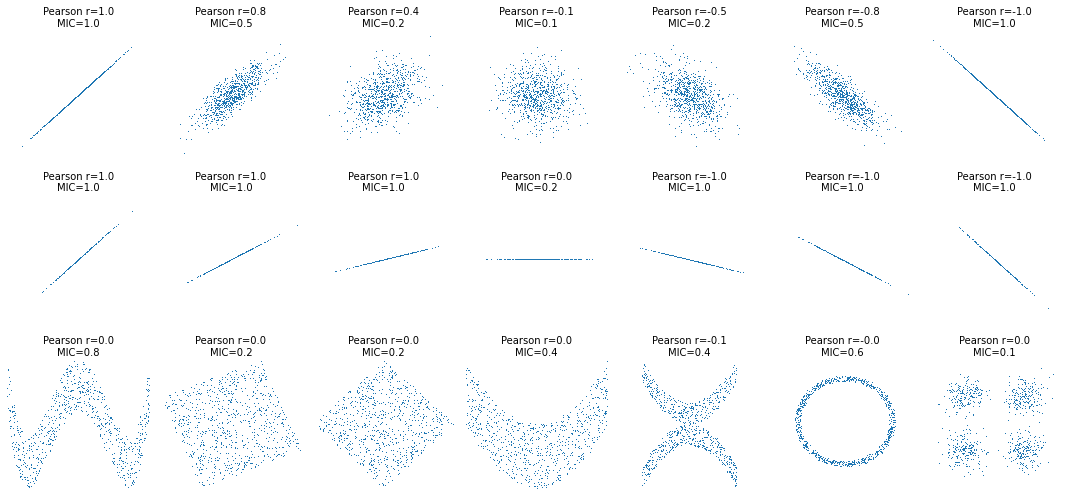

In [3]:
plt.figure(facecolor="white", figsize=(15, 7))
mvnormal(n=800)
rotnormal(n=200)
others(n=800)
plt.tight_layout()
plt.savefig("MIC-2d-correlation.pdf", dpi=300)
plt.show()